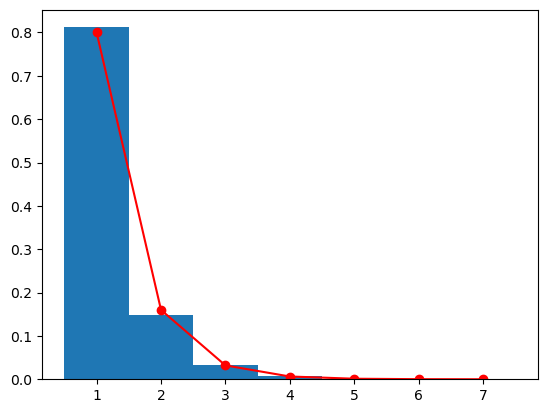

Degrees of freedom: 3
dof: 3
Chi2 stat: 12.5614, p-value: 0.0136


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare
# Point 1

# 10.000 random values from U(0, 1)
n = 10000
U = np.random.uniform(0, 1, size=n)

# value for probability p
p = 0.8
X = np.floor(np.log(U)/(np.log(1-p))) + 1

# True probability
values = np.arange(1, int(X.max()) +1 )
counts = np.array([(X == k).sum() for k in values])


prob_teorica = (1 - p)**(values -1) * p
expected_counts = np.round(prob_teorica * n)


plt.figure()
plt.hist(X, bins=np.arange(1, max(X)+2)-0.5, density=True)
plt.plot(values, prob_teorica, 'ro-')
plt.show()


#GOF test
#We need to make sure that the bins have at least 5 values
observed = counts.copy()
expected = expected_counts.copy()


while np.any(expected < 5):
    idx = np.where(expected < 5)[0]
    if idx[0] == 0:
        
        expected[1] += expected[0]
        observed[1] += observed[0]
        expected = expected[1:]
        observed = observed[1:]
        values = values[1:]
    else:
       
        i = idx[0]
        expected[i-1] += expected[i]
        observed[i-1] += observed[i]
        expected = np.delete(expected, i)
        observed = np.delete(observed, i)
        values = np.delete(values, i)

# The two sums should coincide
expected = expected * (observed.sum() / expected.sum())
dof = len(values) - 1 
print(f"Degrees of freedom: {dof}")
print(f"dof: {dof}")

chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)
print(f"Chi2 stat: {chi2_stat:.4f}, p-value: {p_value:.4f}")






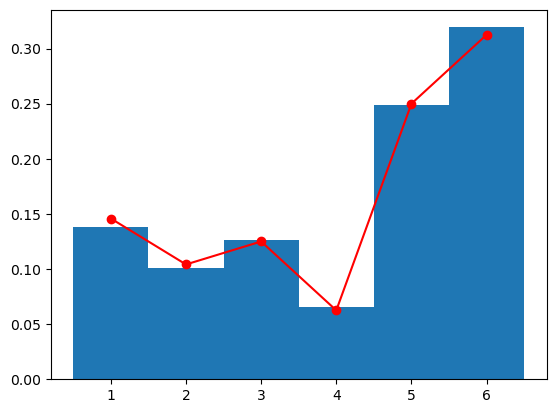

Chi2 stat: 7.7685, p-value: 0.1695
Degrees of freedom: 4


In [ ]:
# Point 2
# (a) Direct method

p = np.array([7/48, 5/48, 1/8, 1/16, 1/4, 5/16])
classes = np.array([1, 2, 3, 4, 5, 6])
cdf = np.cumsum(p)

X_samples = np.zeros_like(U, dtype=classes.dtype)
for i, u in enumerate(U):
    for j, F in enumerate(cdf):
        if u <= F:
            X_samples[i] = classes[j]
            break
counts = np.array([(X_samples == c).sum() for c in classes])

# If we only use one point:
# u = np.random.uniform(0,1)
#for i, F in enumerate(cdf):
#    if u <= F:
#        X = classes[i]
#        break

expected_counts = np.array(n * p)

# Generating histogram

plt.figure()
plt.hist(X_samples, bins=np.arange(1, max(classes)+2)-0.5, density = True,align='mid')
plt.plot(classes, p, 'ro-', label='Theoretical p')
plt.show()



# Ensure the counts match
#expected_values = expected_values * (counts.sum() / np.array(expected_values).sum())

chi2_stat, p_value = chisquare(f_obs=counts, f_exp=expected_counts)
print(f"Chi2 stat: {chi2_stat:.4f}, p-value: {p_value:.4f}") 

dof = len(classes) - 1 
print(f"Degrees of freedom: {dof}")


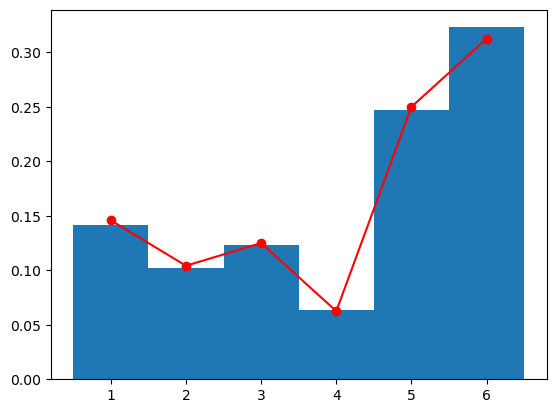

Chi2 stat: 6.0184, p-value: 0.3044
Degrees of freedom: 4


In [ ]:
# Point 2 (b) Rejection Method
c = max(p)
k = len(p)
samples = []
while len(samples) < n:
    u = np.random.uniform(0, 1)
    I = np.floor(k * u).astype(int)
    u2 = np.random.uniform(0, 1)
    if u2 <= p[I] / c:
        samples.append(classes[I])

samples = np.array(samples)



plt.figure()
plt.hist(samples, bins=np.arange(1, max(classes)+2)-0.5, density = True,align='mid')
plt.plot(classes, p, 'ro-', label='Theoretical p')
plt.show()

counts = np.array([(samples == c).sum() for c in classes])
expected_counts = np.array(n * p)

# Chi squared test

chi2_stat, p_value = chisquare(f_obs=counts, f_exp=expected_counts)
print(f"Chi2 stat: {chi2_stat:.4f}, p-value: {p_value:.4f}")


dof = len(classes) - 1 
print(f"Degrees of freedom: {dof}")

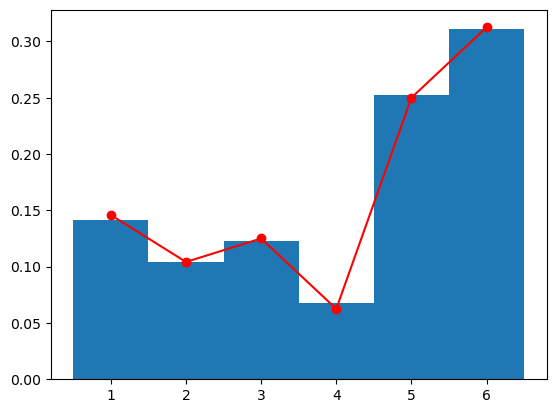

Chi2 stat: 5.9306, p-value: 0.3130
Degrees of freedom: 4


In [ ]:
# Point 2 (c) Alias method

L = np.arange(k)
F = k * p
G = np.where(F >= 1)[0]
S = np.where(F <= 1)[0]

while len(S) > 0 :
    i = G[0]
    j = S[0]
    L[j] = i
    F[i] = F[i] - (1 - F[j])
    if F[i] < 1:
        G = G[1:]
        S = np.append(S,i)
    S = S[1:]

samples = []
while len(samples) < n:
    u = np.random.uniform(0, 1)
    I = np.floor(k * u).astype(int)
    u2 = np.random.uniform(0, 1)
    if u2 <= F[I]:
        samples.append(classes[I])
    else:
        samples.append(classes[(L[I])])

samples = np.array(samples)



plt.figure()
plt.hist(samples, bins=np.arange(1, max(classes)+2)-0.5, density = True,align='mid')
plt.plot(classes, p, 'ro-', label='Theoretical p')
plt.show()


counts = np.array([(samples == c).sum() for c in classes])
expected_counts = np.array(n * p)

# Chi squared test

chi2_stat, p_value = chisquare(f_obs=counts, f_exp=expected_counts)
print(f"Chi2 stat: {chi2_stat:.4f}, p-value: {p_value:.4f}")


dof = len(classes) - 1 
print(f"Degrees of freedom: {dof}")